#Importing Libraries

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import KNNImputer
%matplotlib inline

#Loading and Understanding the Dataset

In [154]:
diabetes_df = pd.read_csv("diabetes.csv")

In [155]:
#Shape of the dataset
diabetes_df.shape

(768, 9)

In [156]:
#Sample of the dataset
diabetes_df.sample(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
390,1,100,66,29,196,32.0,0.444,42,0
342,1,0,68,35,0,32.0,0.389,22,0
487,0,173,78,32,265,46.5,1.159,58,0
703,2,129,0,0,0,38.5,0.304,41,0
732,2,174,88,37,120,44.5,0.646,24,1
192,7,159,66,0,0,30.4,0.383,36,1
522,6,114,0,0,0,0.0,0.189,26,0
759,6,190,92,0,0,35.5,0.278,66,1
379,0,93,100,39,72,43.4,1.021,35,0
327,10,179,70,0,0,35.1,0.200,37,0


In [157]:
#Read column names and datatype
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [158]:
#Statistical Information
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#Data Cleaning

In [159]:
#Check null values
diabetes_df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


<Axes: >

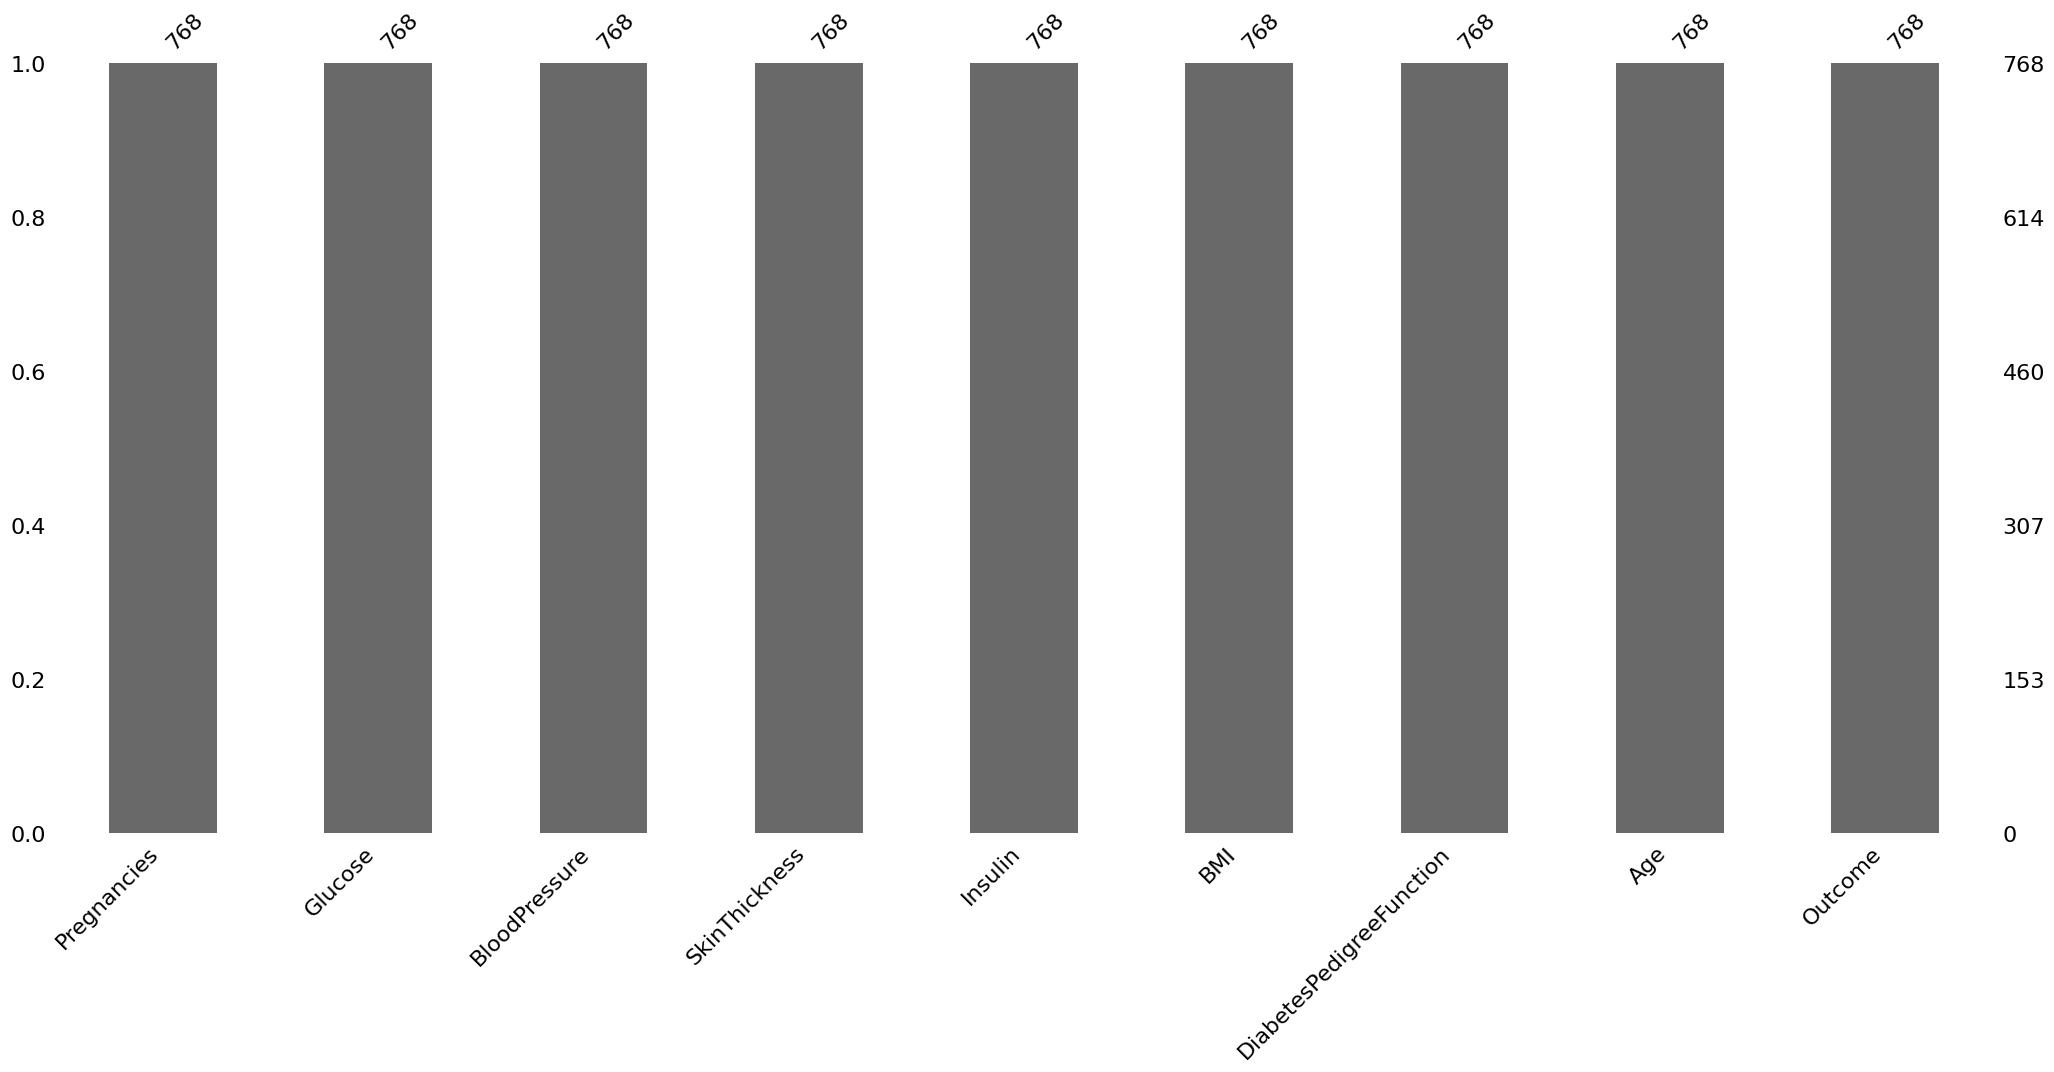

In [160]:
#Missing number bar plot
msno.bar(diabetes_df)

The code shows that there are no missing numbers in dataset. But while reading the dataset, it was found that there were numerous missing values and they are represented with 0(zero). So, replacing all 0s with NaN.

In [161]:
#Number of 0s in dataset
zero_count = (diabetes_df == 0).sum()
zero_count

,0
Pregnancies,111
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,500


Now,
1. 'Outcome' column is categorical -> 0 is expected indicating a person to be Non-diabetic
2. 'Pregnancies' indicates 'Number of times pregnant' -> 0 is expected

Replacing 0 with NaN for the rest of the columns.

In [162]:
#Copying the original dataset in diabetes_df_copy
diabetes_df_copy = diabetes_df.copy(deep = True)
#Replacing 0 with NaN for Glucose, BloodPressure, SkinThickness, Insulin, BMI
diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)

In [163]:
diabetes_df_copy.sample(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
759,6,190.0,92.0,NaN,NaN,35.5,0.278,66,1
66,0,109.0,88.0,30.0,NaN,32.5,0.855,38,1
733,2,106.0,56.0,27.0,165.0,29.0,0.426,22,0
10,4,110.0,92.0,NaN,NaN,37.6,0.191,30,0
348,3,99.0,62.0,19.0,74.0,21.8,0.279,26,0
541,3,128.0,72.0,25.0,190.0,32.4,0.549,27,1
309,2,124.0,68.0,28.0,205.0,32.9,0.875,30,1
647,0,179.0,50.0,36.0,159.0,37.8,0.455,22,1
296,2,146.0,70.0,38.0,360.0,28.0,0.337,29,1
678,3,121.0,52.0,NaN,NaN,36.0,0.127,25,1


In [164]:
#Checking Null values in new dataset
null_sum = diabetes_df_copy.isnull().sum()
null_sum

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


<Axes: >

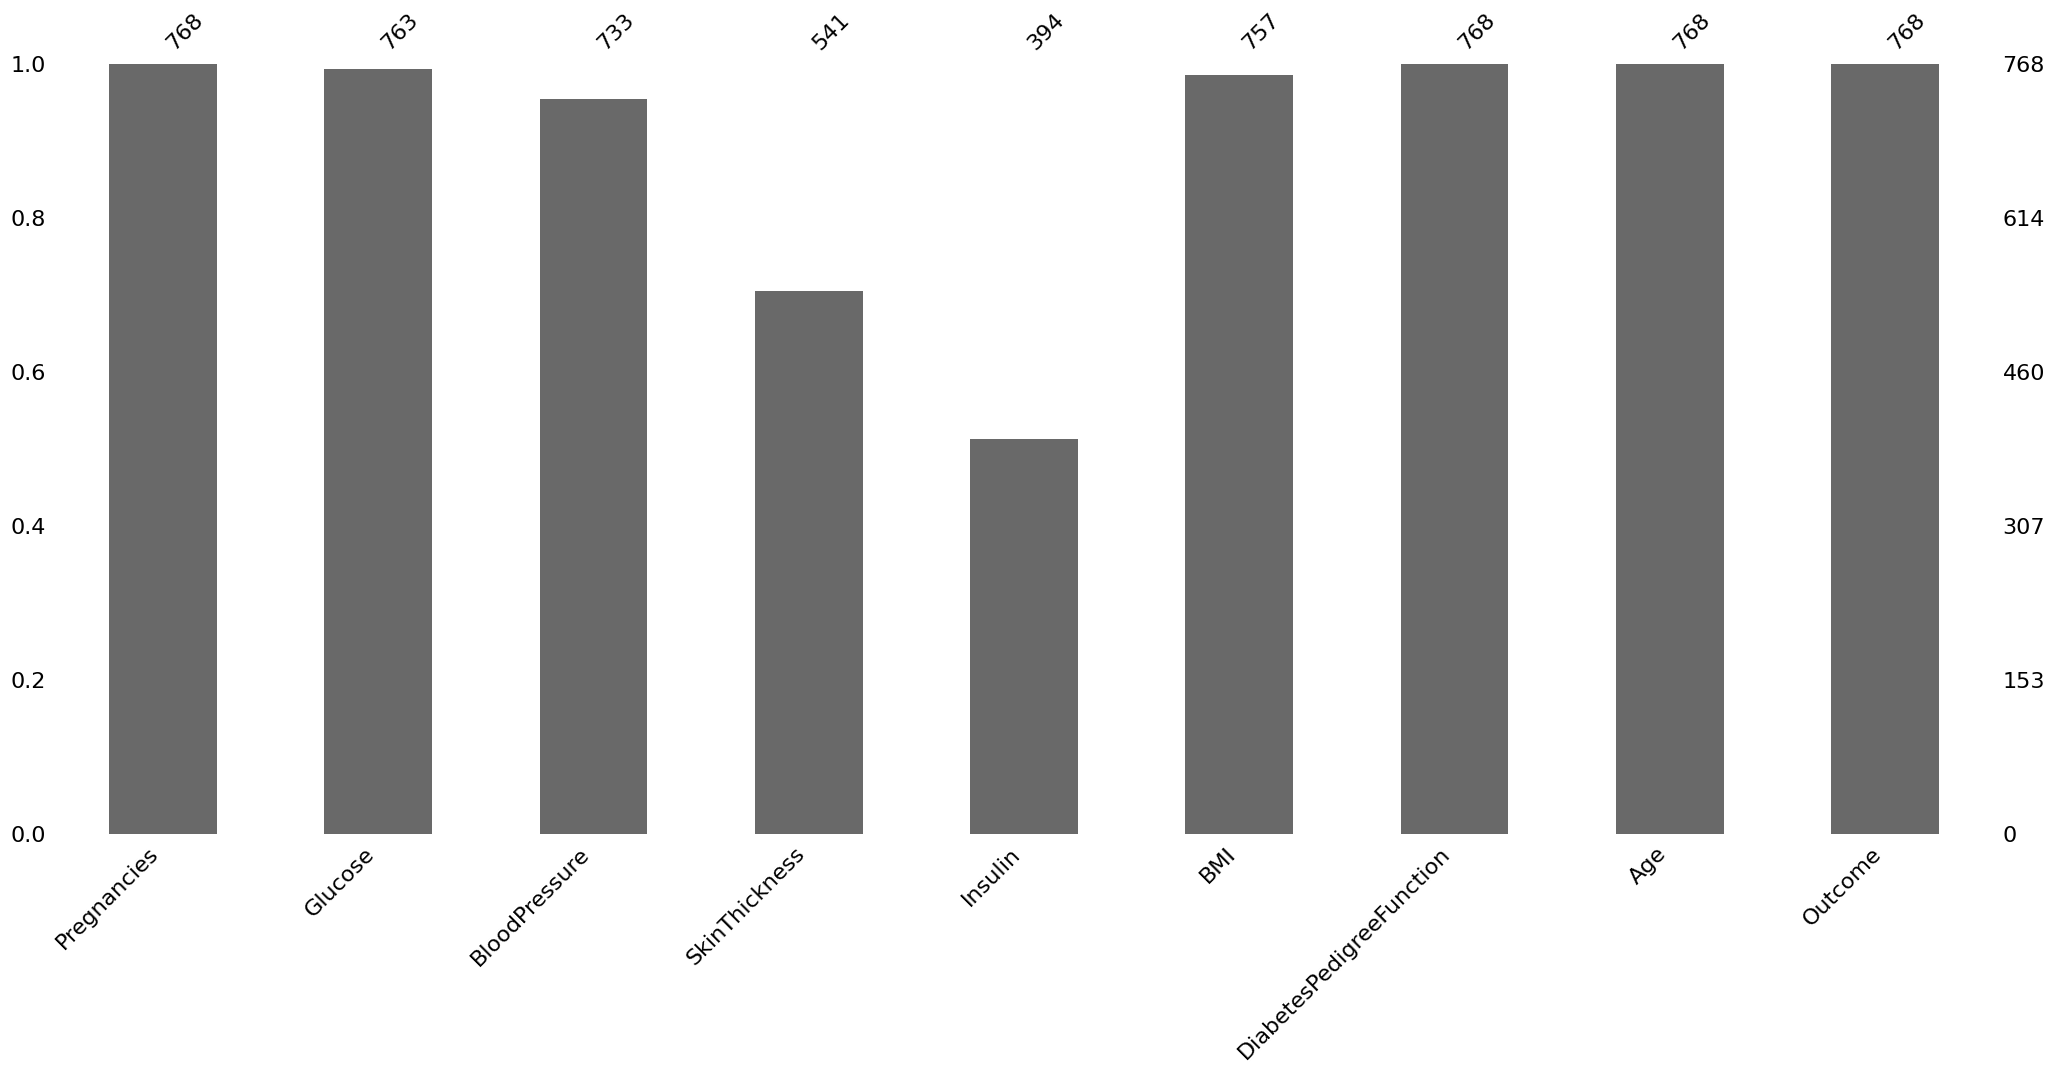

In [165]:
# Missing number bar plot
msno.bar(diabetes_df_copy)

In [166]:
#Calculate the total percentage of null values
null_percent = (diabetes_df_copy.isnull().sum()/len(diabetes_df_copy))*100
print(pd.DataFrame({
    "Null Values":null_sum,
    "Percentage":null_percent
}))

                          Null Values  Percentage
Pregnancies                         0    0.000000
Glucose                             5    0.651042
BloodPressure                      35    4.557292
SkinThickness                     227   29.557292
Insulin                           374   48.697917
BMI                                11    1.432292
DiabetesPedigreeFunction            0    0.000000
Age                                 0    0.000000
Outcome                             0    0.000000


In [167]:
df = pd.DataFrame()
df['corr1'] = diabetes_df_copy.corr()["Outcome"].sort_values(ascending=False)
df

,corr1
Outcome,1.000000
Glucose,0.494650
BMI,0.313680
Insulin,0.303454
SkinThickness,0.259491
Age,0.238356
Pregnancies,0.221898
DiabetesPedigreeFunction,0.173844
BloodPressure,0.170589


In [168]:
df['cov1'] = diabetes_df_copy.cov()["Outcome"].sort_values(ascending=False)
df

,corr1,cov1
Outcome,1.000000,0.227483
Glucose,0.494650,7.202521
BMI,0.313680,1.037718
Insulin,0.303454,16.968781
SkinThickness,0.259491,1.282193
Age,0.238356,1.336953
Pregnancies,0.221898,0.356618
DiabetesPedigreeFunction,0.173844,0.027472
BloodPressure,0.170589,1.003953


Imputation for Null values
1. For 'Glucose', 'BloodPressure', 'BMI' -> Missing number percentage <5% -> Impute with mean or median depending on data distribution (normal or skewed)
2. For 'Insulin' and 'SkinThickness' -> Missing number percentage >5%
    Best results with median value


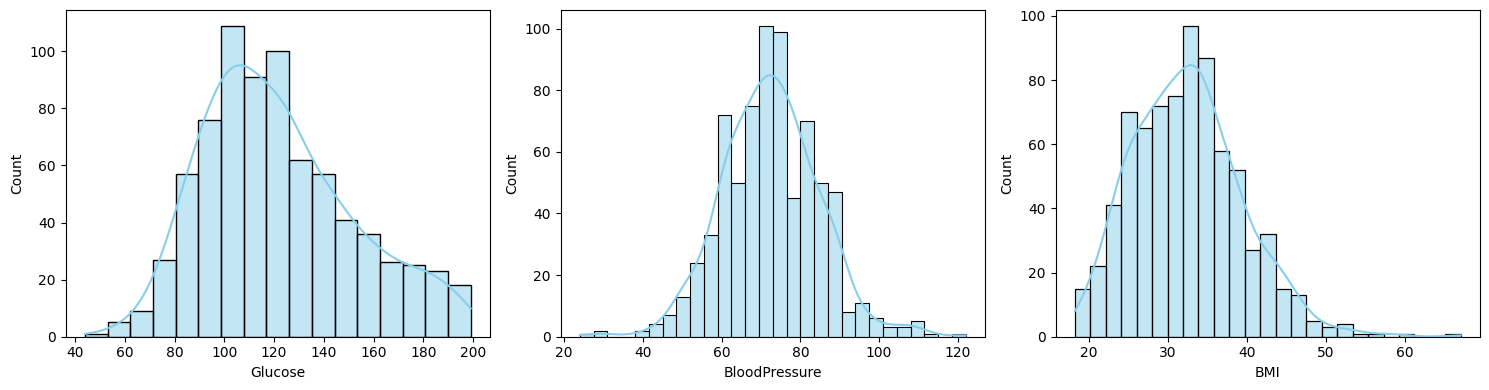

In [169]:
# Distribution of data
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.histplot(diabetes_df_copy['Glucose'], kde=True, color='skyblue', ax=axes[0])
sns.histplot(diabetes_df_copy['BloodPressure'], kde=True, color='skyblue', ax=axes[1])
sns.histplot(diabetes_df_copy['BMI'], kde=True, color='skyblue', ax=axes[2])

plt.tight_layout()
plt.show()

In [170]:
# Skew values
print("Skewness of Glucose:", diabetes_df_copy['Glucose'].skew())
print("Skewness of BloodPressure:", diabetes_df_copy['BloodPressure'].skew())
print("Skewness of BMI:", diabetes_df_copy['BMI'].skew())

Skewness of Glucose: 0.5309885349396285
Skewness of BloodPressure: 0.13415273171959252
Skewness of BMI: 0.5939697505712673


Thus, 'Glucose' and 'BloodPressure' is normally distributed and 'BMI' is right skewed. So will impute 'Glucose' and 'BloodPressure' with mean and 'BMI' with median.

In [171]:
#Imputation
diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(), inplace=True)
diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].mean(), inplace=True)
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].median(), inplace=True)

/tmp/ipython-input-55040558.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(), inplace=True)
/tmp/ipython-input-55040558.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].meth

In [172]:
diabetes_df_copy.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,227
Insulin,374
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [173]:
diabetes_df_copy.sample(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
27,1,97.0,66.000000,15.0,140.0,23.2,0.487,22,0
2,8,183.0,64.000000,NaN,NaN,23.3,0.672,32,1
299,8,112.0,72.000000,NaN,NaN,23.6,0.840,58,0
751,1,121.0,78.000000,39.0,74.0,39.0,0.261,28,0
23,9,119.0,80.000000,35.0,NaN,29.0,0.263,29,1
710,3,158.0,64.000000,13.0,387.0,31.2,0.295,24,0
665,1,112.0,80.000000,45.0,132.0,34.8,0.217,24,0
63,2,141.0,58.000000,34.0,128.0,25.4,0.699,24,0
744,13,153.0,88.000000,37.0,140.0,40.6,1.174,39,0
675,6,195.0,70.000000,NaN,NaN,30.9,0.328,31,1


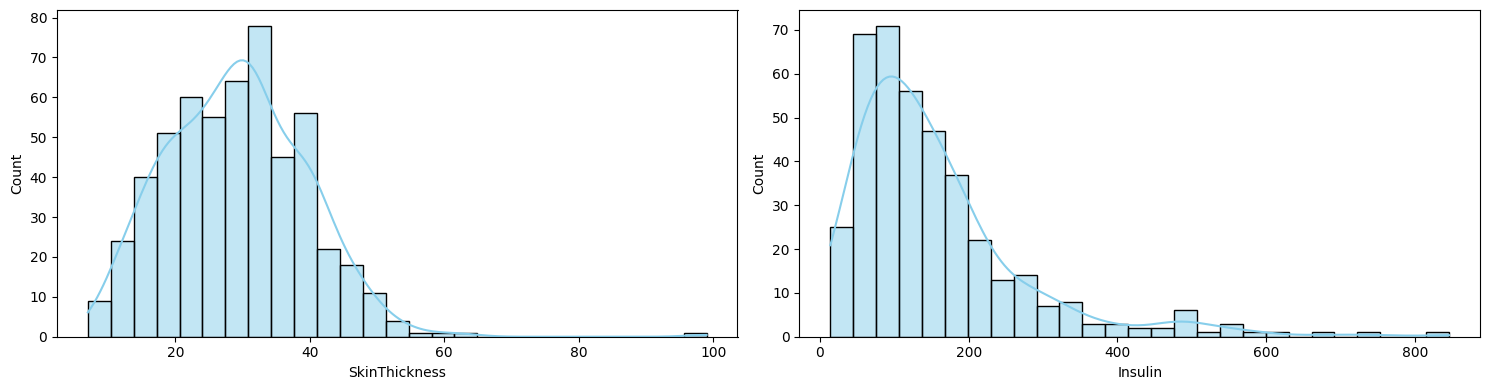

In [174]:
#Distribution of Insulin and SkinThickness
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

sns.histplot(diabetes_df_copy['SkinThickness'], kde=True, color='skyblue', ax=axes[0])
sns.histplot(diabetes_df_copy['Insulin'], kde=True, color='skyblue', ax=axes[1])


plt.tight_layout()
plt.show()

In [175]:
#Skew value
print("Skewness of SkinThickness:", diabetes_df_copy['SkinThickness'].skew())
print("Skewness of Insulin:", diabetes_df_copy['Insulin'].skew())

Skewness of SkinThickness: 0.690619013984192
Skewness of Insulin: 2.166463843812443


In [176]:
#Fill null values with random number
diabetes_df_copy['SkinThickness'].fillna(np.random.randint(diabetes_df_copy['SkinThickness'].min(), diabetes_df_copy['SkinThickness'].max()), inplace=True)
diabetes_df_copy['Insulin'].fillna(np.random.randint(diabetes_df_copy['Insulin'].min(), diabetes_df_copy['Insulin'].max()), inplace=True)


/tmp/ipython-input-2023544297.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetes_df_copy['SkinThickness'].fillna(np.random.randint(diabetes_df_copy['SkinThickness'].min(), diabetes_df_copy['SkinThickness'].max()), inplace=True)
/tmp/ipython-input-2023544297.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are sett

In [177]:
#skew value
print("Skewness of SkinThickness:", diabetes_df_copy['SkinThickness'].skew())
print("Skewness of Insulin:", diabetes_df_copy['Insulin'].skew())

Skewness of SkinThickness: 1.2230571171743103
Skewness of Insulin: -0.21697078414602974


In [178]:
df['corr2'] = diabetes_df_copy.corr()["Outcome"].sort_values(ascending=False)
df['cov2'] = diabetes_df_copy.cov()["Outcome"].sort_values(ascending=False)
df

,corr1,cov1,corr2,cov2
Outcome,1.000000,0.227483,1.000000,0.227483
Glucose,0.494650,7.202521,0.492928,7.155569
BMI,0.313680,1.037718,0.312038,1.023213
Insulin,0.303454,16.968781,0.132812,11.999470
SkinThickness,0.259491,1.282193,0.189065,0.832226
Age,0.238356,1.336953,0.238356,1.336953
Pregnancies,0.221898,0.356618,0.221898,0.356618
DiabetesPedigreeFunction,0.173844,0.027472,0.173844,0.027472
BloodPressure,0.170589,1.003953,0.166074,0.958140


In [179]:
# Check duplicate values
diabetes_df_copy.duplicated().sum()

np.int64(0)

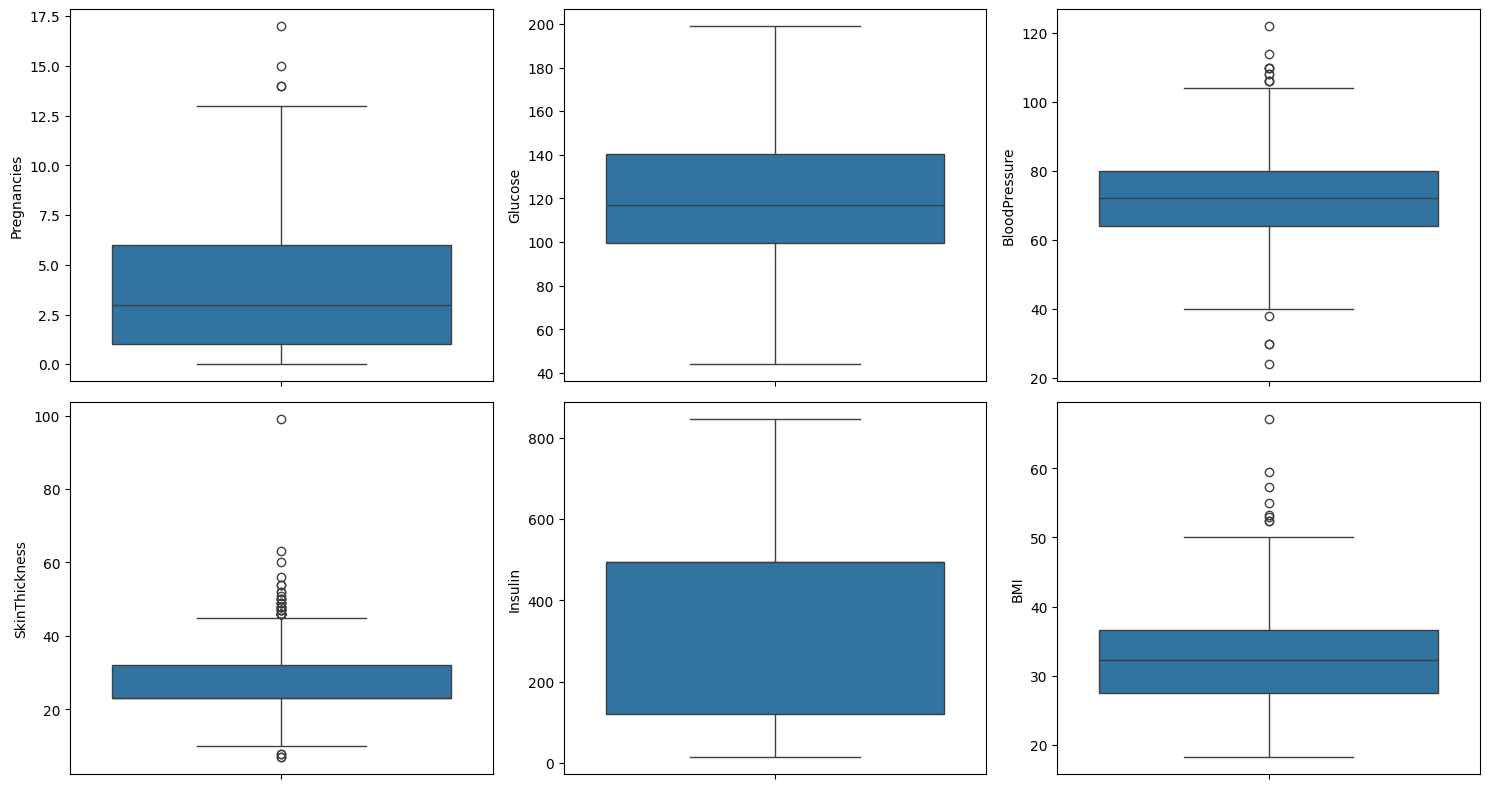

In [180]:
#USing Box-plot to check outliers
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

sns.boxplot(diabetes_df_copy['Pregnancies'], ax=axes[0, 0])
sns.boxplot(diabetes_df_copy['Glucose'], ax=axes[0, 1])
sns.boxplot(diabetes_df_copy['BloodPressure'], ax=axes[0, 2])
sns.boxplot(diabetes_df_copy['SkinThickness'], ax=axes[1, 0])
sns.boxplot(diabetes_df_copy['Insulin'], ax=axes[1, 1])
sns.boxplot(diabetes_df_copy['BMI'], ax=axes[1, 2])

plt.tight_layout()
plt.show()

#EDA

Steps followed in EDA :
1. Univariate Analysis
2. Multivariate Analysis
3. Feature Engineering
4. Outlier Handling
5. Scaling/Normalisation
6. Feature Selection
7. Final EDA checks

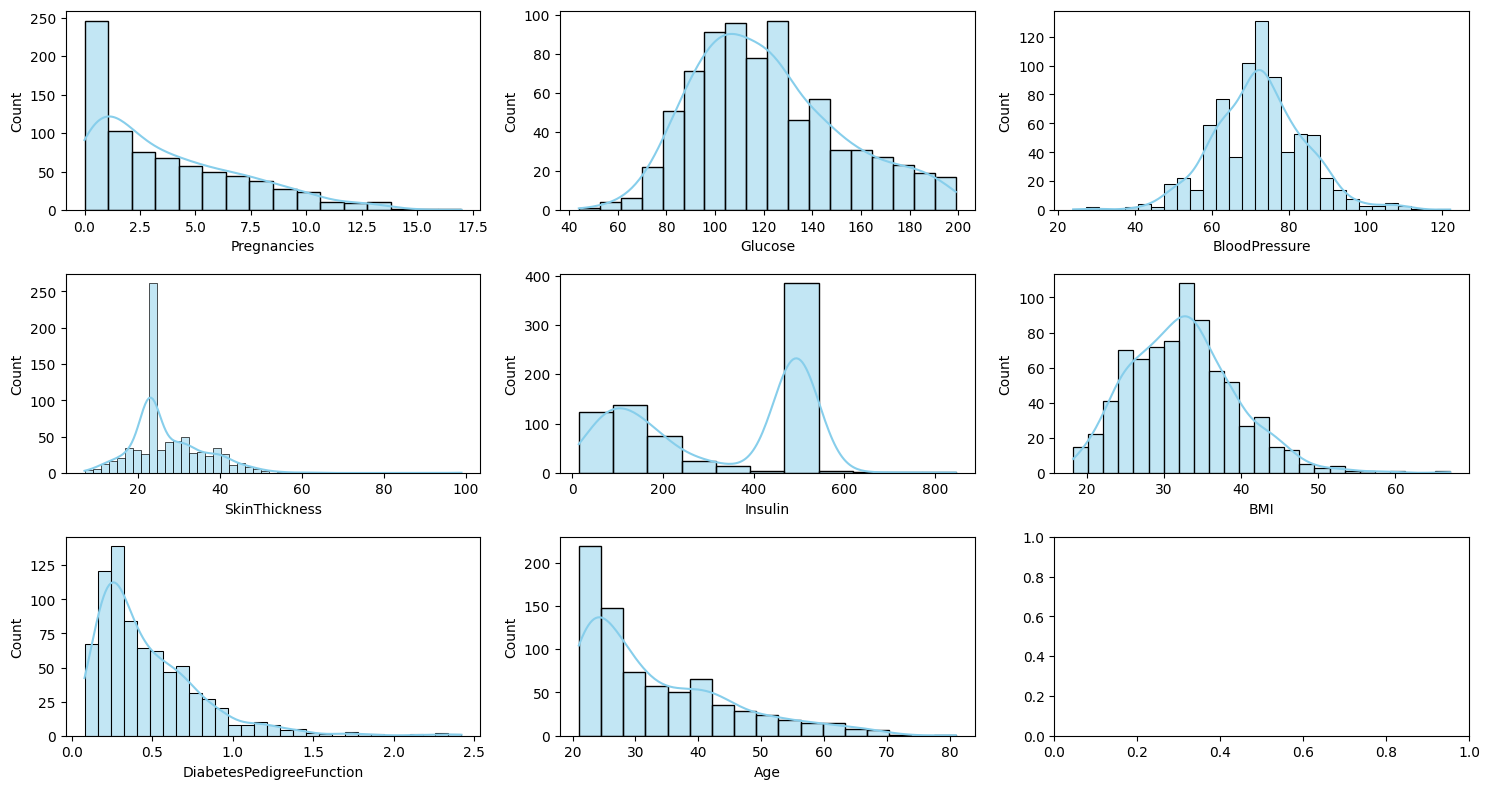

In [181]:
# 1. Univariate Analysis
fig, axes = plt.subplots(3, 3, figsize=(15, 8))

sns.histplot(diabetes_df_copy['Pregnancies'], kde=True, color='skyblue',ax=axes[0, 0])
sns.histplot(diabetes_df_copy['Glucose'], kde=True, color='skyblue',ax=axes[0, 1])
sns.histplot(diabetes_df_copy['BloodPressure'], kde=True, color='skyblue',ax=axes[0, 2])
sns.histplot(diabetes_df_copy['SkinThickness'], kde=True, color='skyblue',ax=axes[1, 0])
sns.histplot(diabetes_df_copy['Insulin'], kde=True, color='skyblue',ax=axes[1, 1])
sns.histplot(diabetes_df_copy['BMI'], kde=True, color='skyblue',ax=axes[1, 2])
sns.histplot(diabetes_df_copy['DiabetesPedigreeFunction'], kde=True, color='skyblue',ax=axes[2, 0])
sns.histplot(diabetes_df_copy['Age'], kde=True, color='skyblue',ax=axes[2, 1])

plt.tight_layout()
plt.show()

In [182]:
df_skew = pd.DataFrame()
df_skew['skew'] = diabetes_df_copy.skew()
df_skew

,skew
Pregnancies,0.901674
Glucose,0.532719
BloodPressure,0.137305
SkinThickness,1.223057
Insulin,-0.216971
BMI,0.599233
DiabetesPedigreeFunction,1.919911
Age,1.129597
Outcome,0.635017


<Axes: xlabel='Outcome', ylabel='Count'>

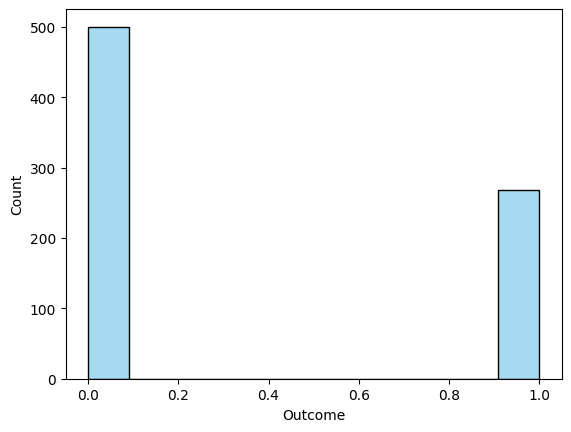

In [183]:
sns.histplot(diabetes_df_copy['Outcome'], color='skyblue')

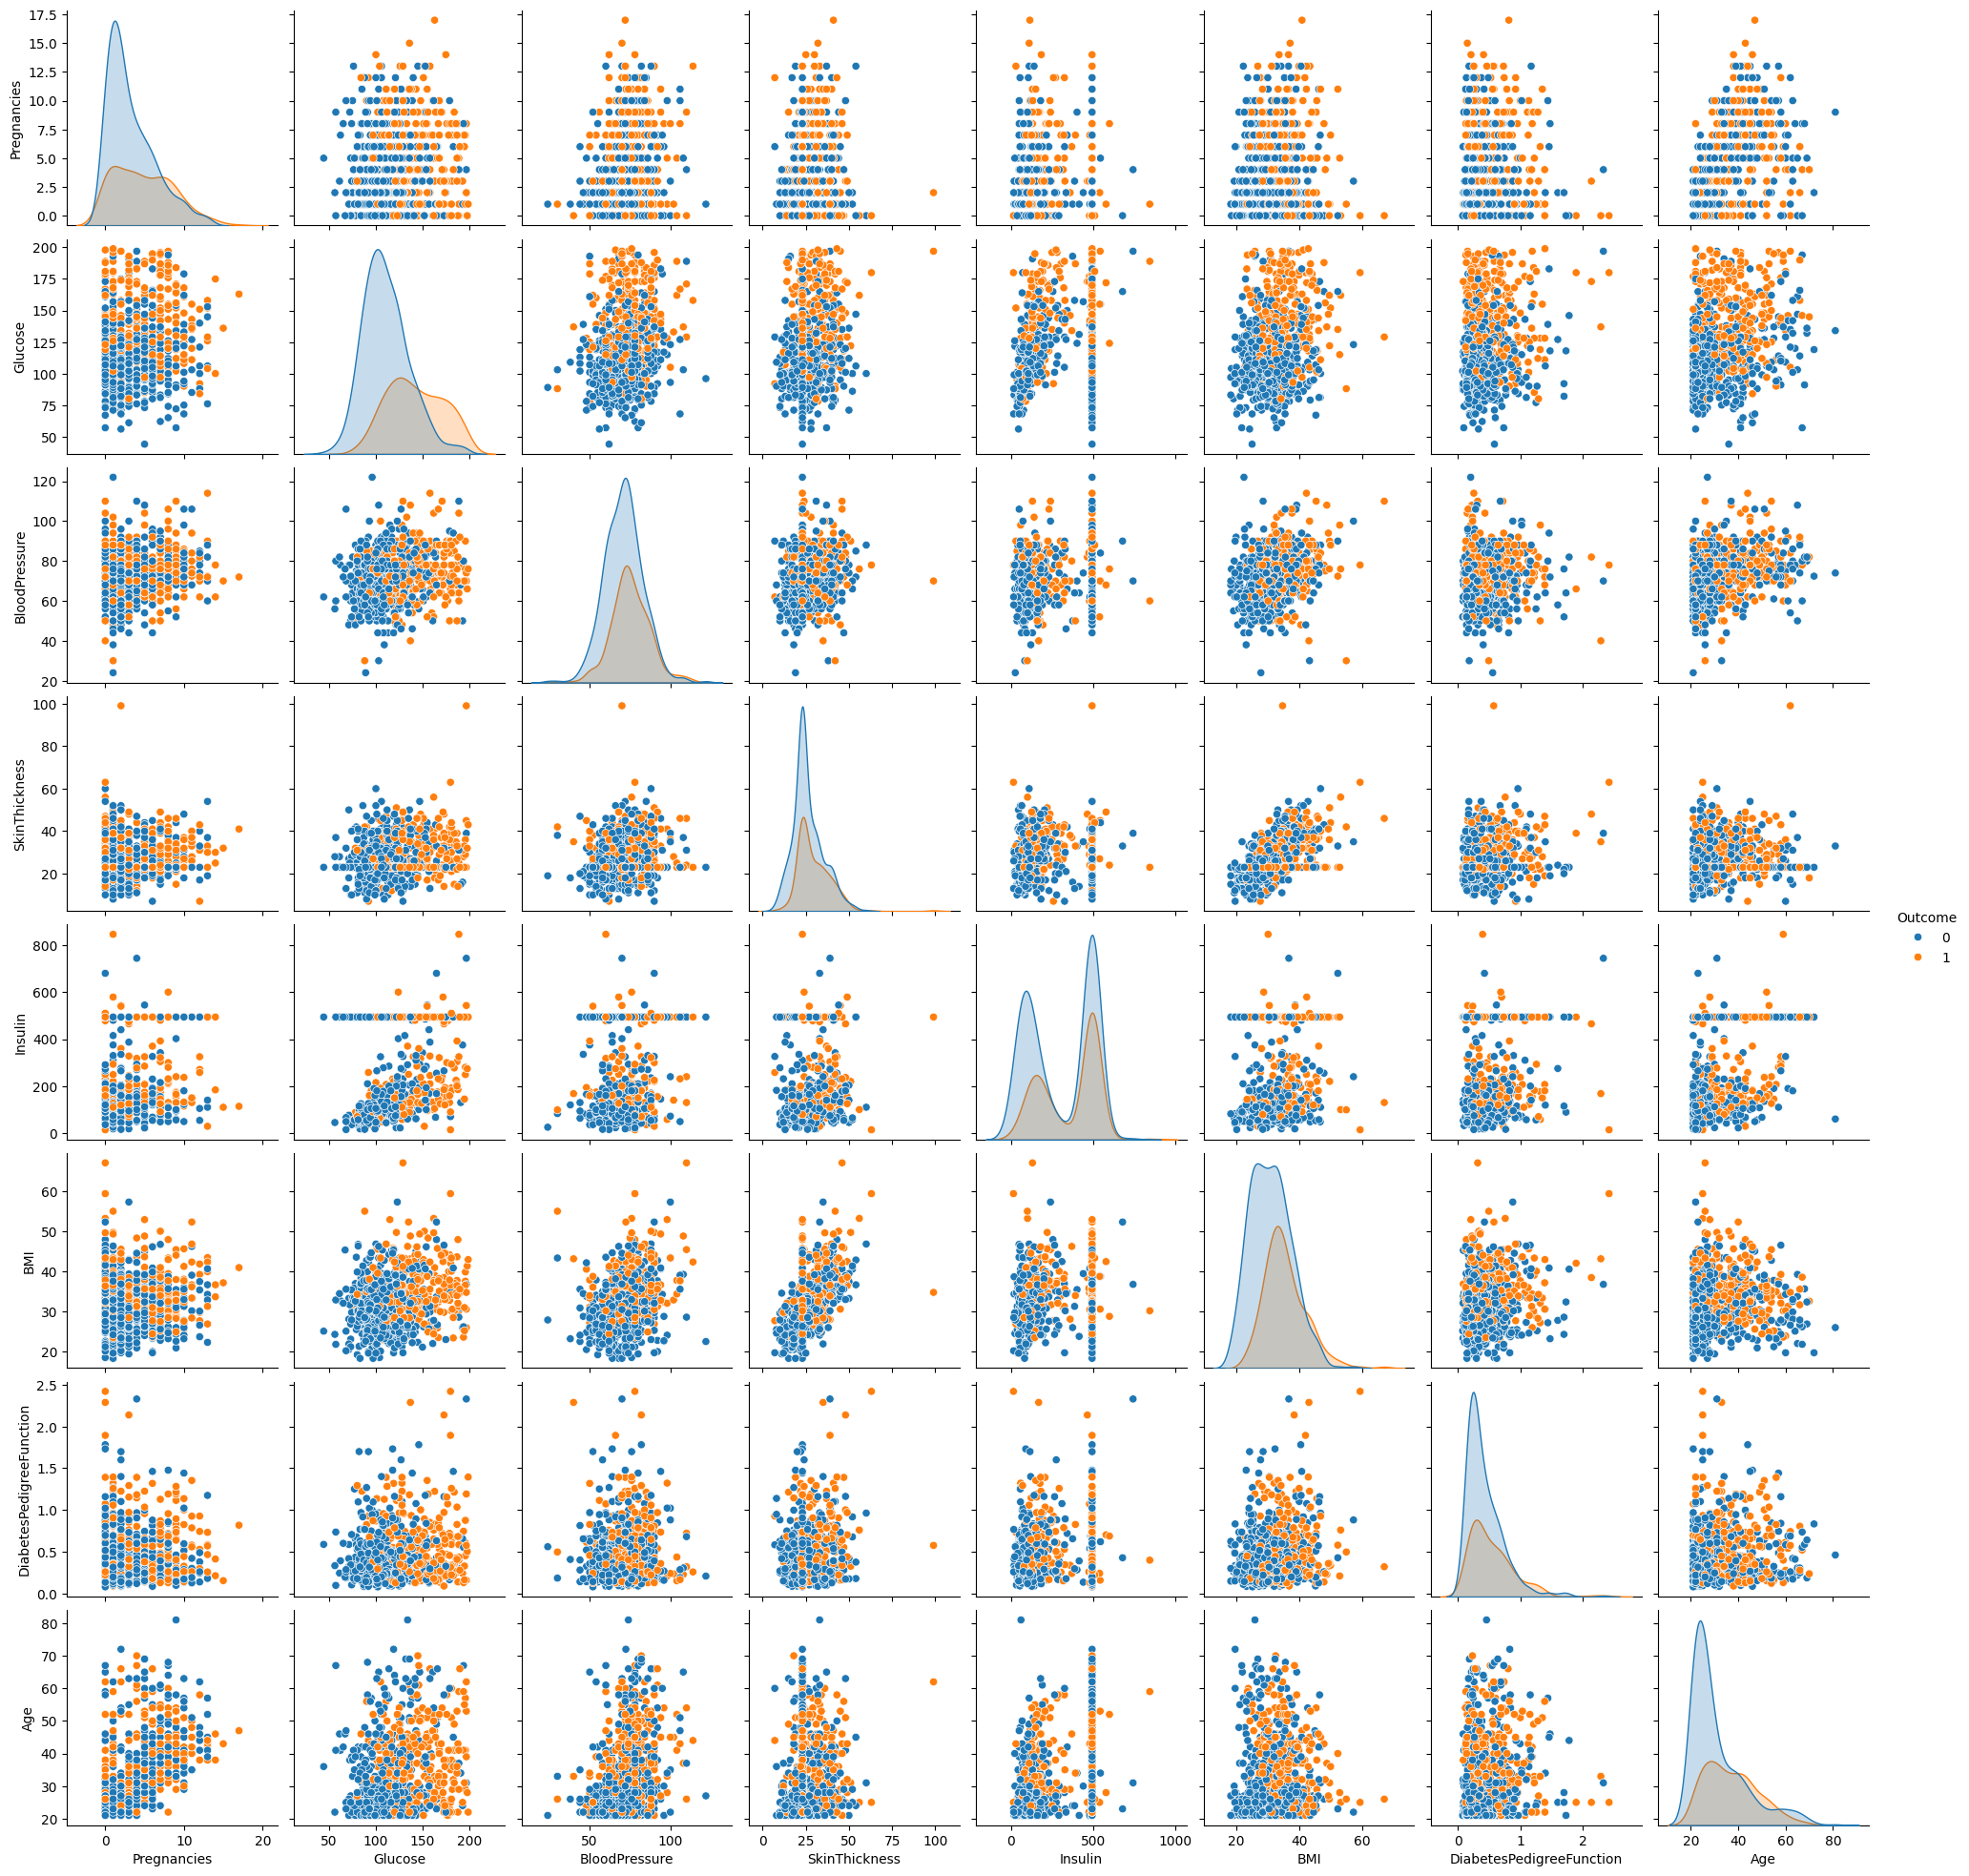

In [184]:
# 2. Bivariate Analysis
# a. Pair plot
sns.pairplot(diabetes_df_copy, hue='Outcome')

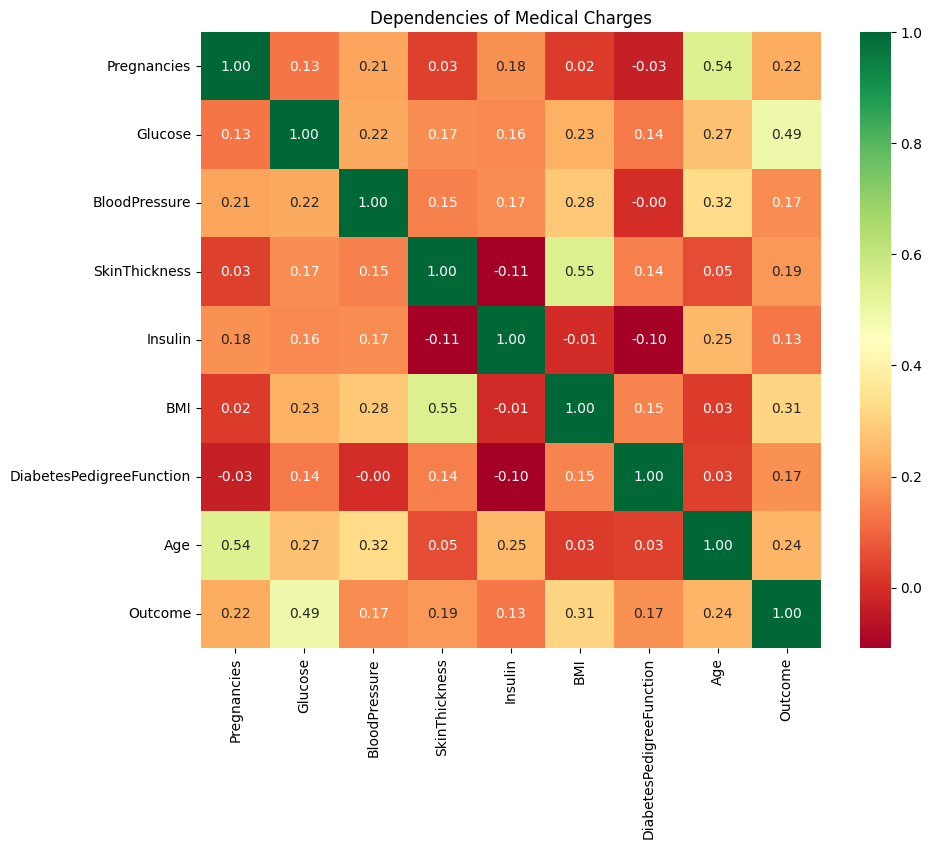

In [185]:
# b. Correlation Matrix
corr = diabetes_df_copy.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr,cmap='RdYlGn',annot=True,fmt=".2f",ax=ax)
plt.title("Dependencies of Medical Charges")

plt.show()

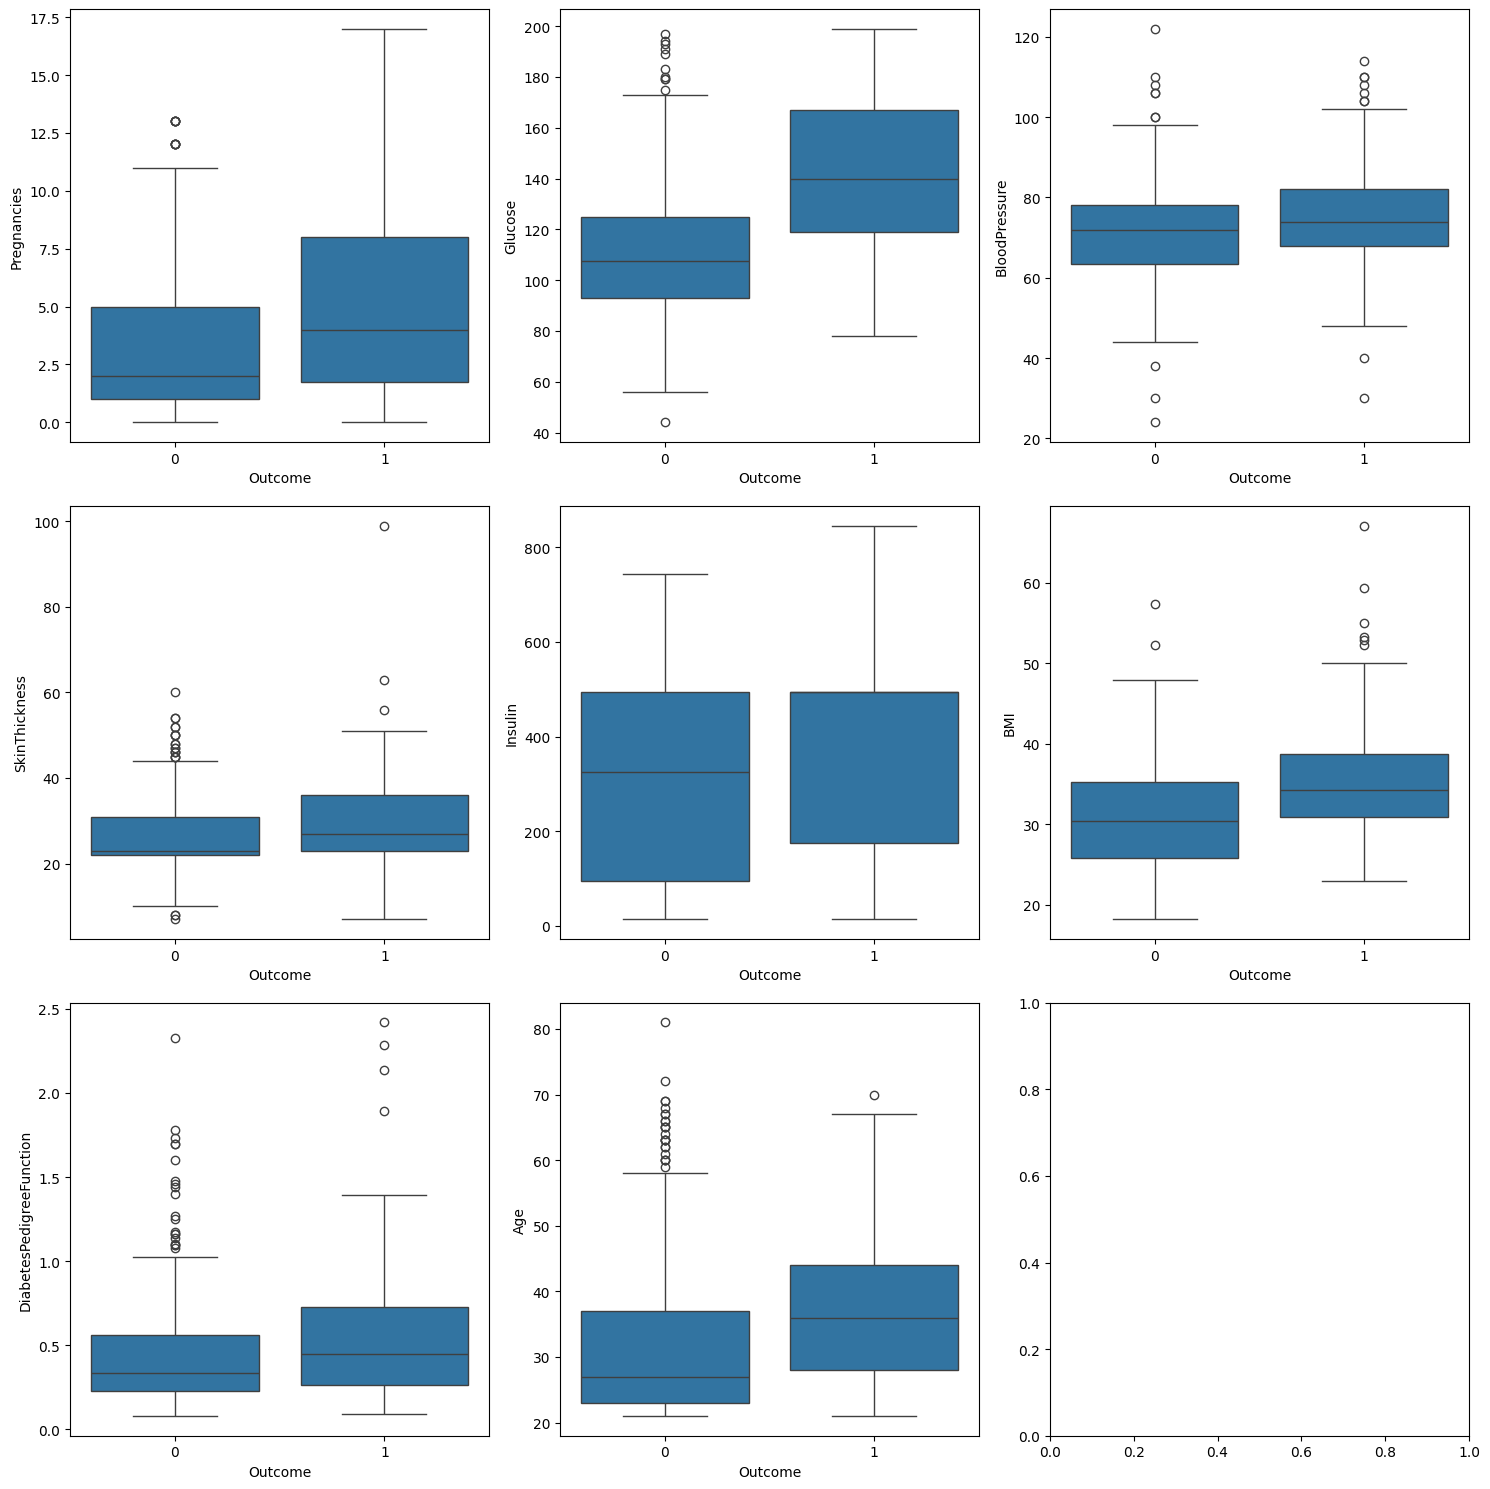

In [186]:
# c. Box-plot
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

sns.boxplot(x= 'Outcome', y= 'Pregnancies', data=diabetes_df_copy , ax=axes[0,0])
sns.boxplot(x='Outcome', y='Glucose', data=diabetes_df_copy, ax=axes[0,1])
sns.boxplot(x='Outcome', y='BloodPressure', data=diabetes_df_copy, ax=axes[0,2])
sns.boxplot(x='Outcome', y='SkinThickness', data=diabetes_df_copy, ax=axes[1,0])
sns.boxplot(x='Outcome', y='Insulin', data=diabetes_df_copy, ax=axes[1,1])
sns.boxplot(x='Outcome', y='BMI', data=diabetes_df_copy, ax=axes[1,2])
sns.boxplot(x='Outcome', y='DiabetesPedigreeFunction', data=diabetes_df_copy, ax=axes[2,0])
sns.boxplot(x='Outcome', y='Age', data=diabetes_df_copy, ax=axes[2,1])

plt.tight_layout()
plt.show()

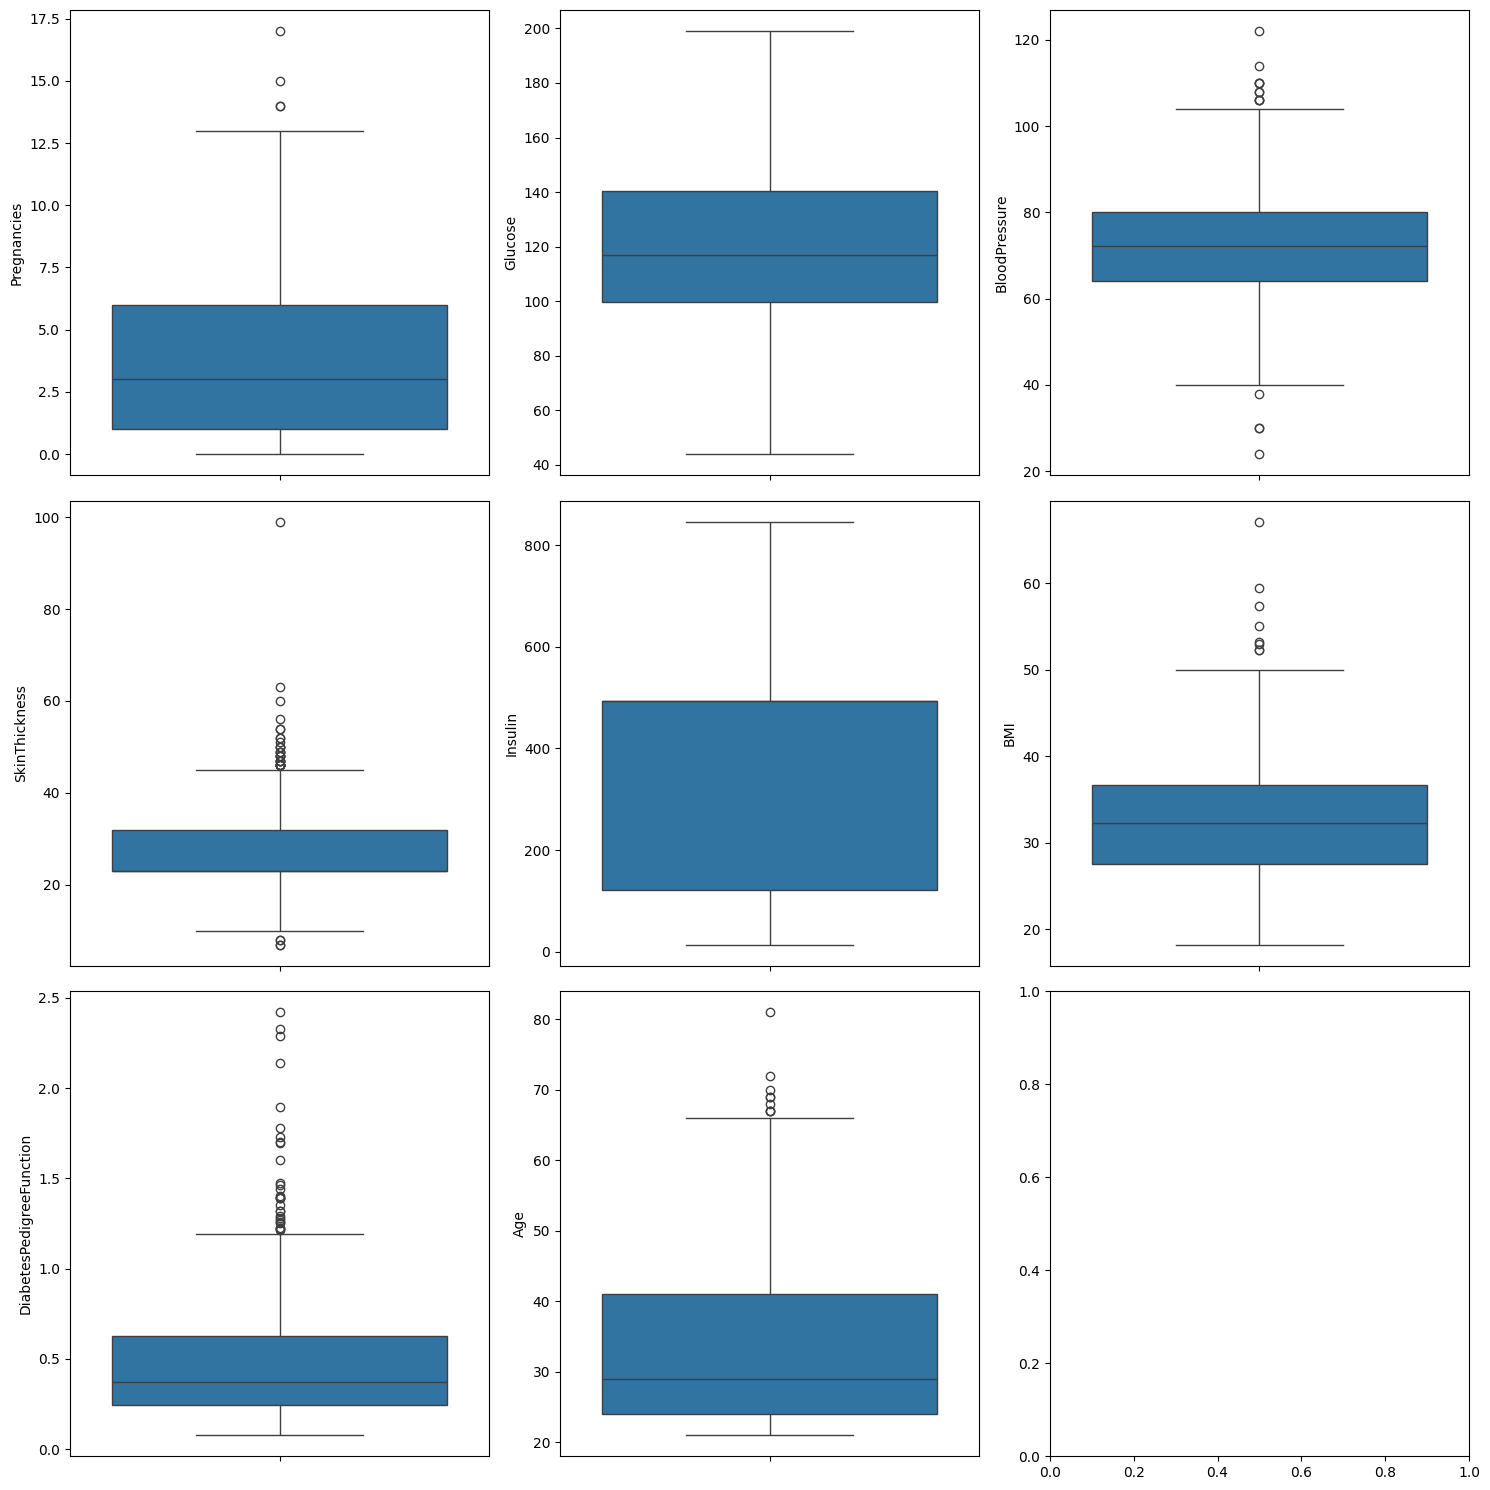

In [187]:
#Handling Outliers
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

sns.boxplot(diabetes_df_copy['Pregnancies'], ax=axes[0, 0])
sns.boxplot(diabetes_df_copy['Glucose'], ax=axes[0, 1])
sns.boxplot(diabetes_df_copy['BloodPressure'], ax=axes[0, 2])
sns.boxplot(diabetes_df_copy['SkinThickness'], ax=axes[1, 0])
sns.boxplot(diabetes_df_copy['Insulin'], ax=axes[1, 1])
sns.boxplot(diabetes_df_copy['BMI'], ax=axes[1, 2])
sns.boxplot(diabetes_df_copy['DiabetesPedigreeFunction'], ax=axes[2, 0])
sns.boxplot(diabetes_df_copy['Age'], ax=axes[2, 1])

plt.tight_layout()
plt.show()

In [188]:
# Using Capping Method (Inter-Quartile-Range)
for col in diabetes_df_copy.columns:
  q1 = diabetes_df_copy[col].quantile(0.25)
  q3 = diabetes_df_copy[col].quantile(0.75)
  iqr = q3-q1
  min = q1 - (1.5*iqr)
  max = q3 + (1.5*iqr)
  diabetes_df_copy[col] = np.where(diabetes_df_copy[col]<min,min,diabetes_df_copy[col])
  diabetes_df_copy[col] = np.where(diabetes_df_copy[col]>max,max,diabetes_df_copy[col])


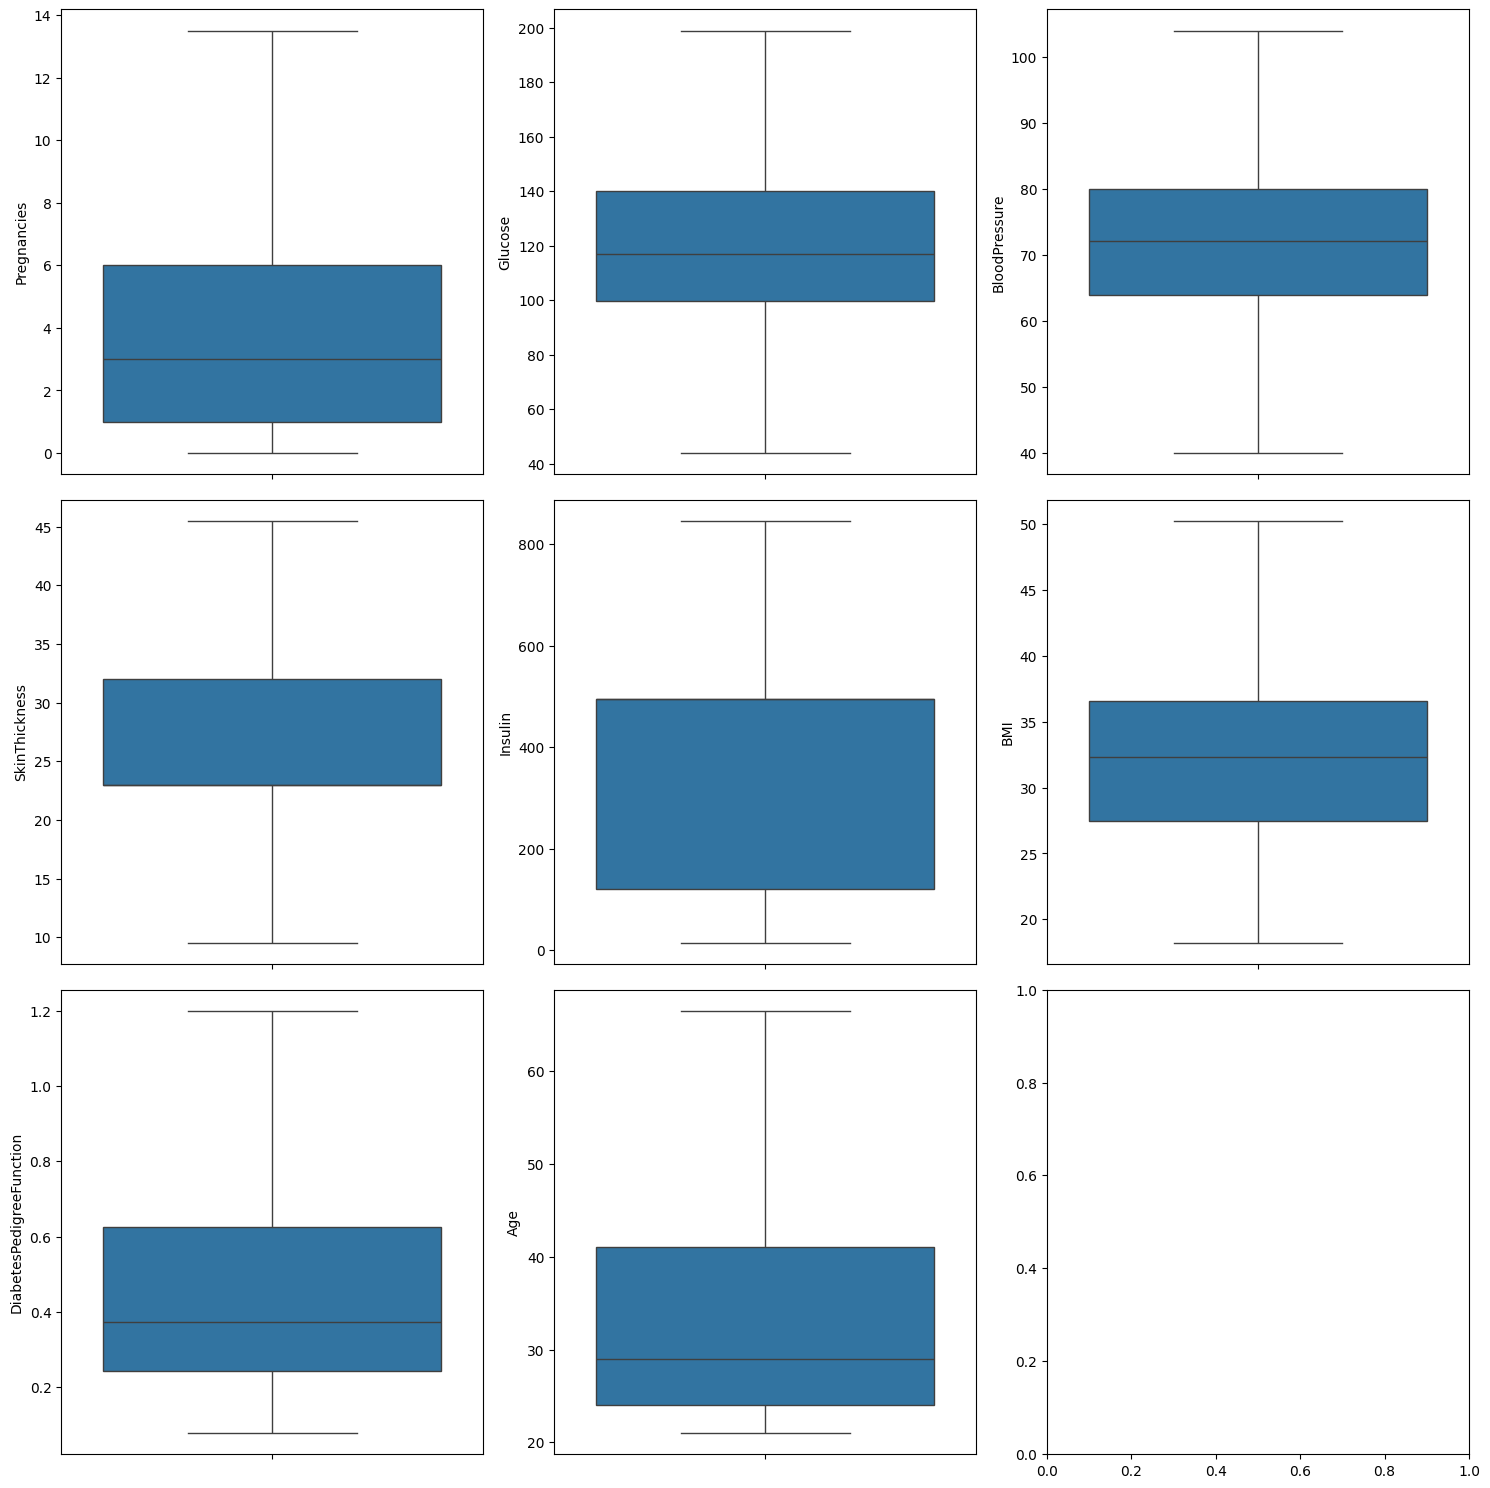

In [189]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

sns.boxplot(diabetes_df_copy['Pregnancies'], ax=axes[0, 0])
sns.boxplot(diabetes_df_copy['Glucose'], ax=axes[0, 1])
sns.boxplot(diabetes_df_copy['BloodPressure'], ax=axes[0, 2])
sns.boxplot(diabetes_df_copy['SkinThickness'], ax=axes[1, 0])
sns.boxplot(diabetes_df_copy['Insulin'], ax=axes[1, 1])
sns.boxplot(diabetes_df_copy['BMI'], ax=axes[1, 2])
sns.boxplot(diabetes_df_copy['DiabetesPedigreeFunction'], ax=axes[2, 0])
sns.boxplot(diabetes_df_copy['Age'], ax=axes[2, 1])

plt.tight_layout()
plt.show()

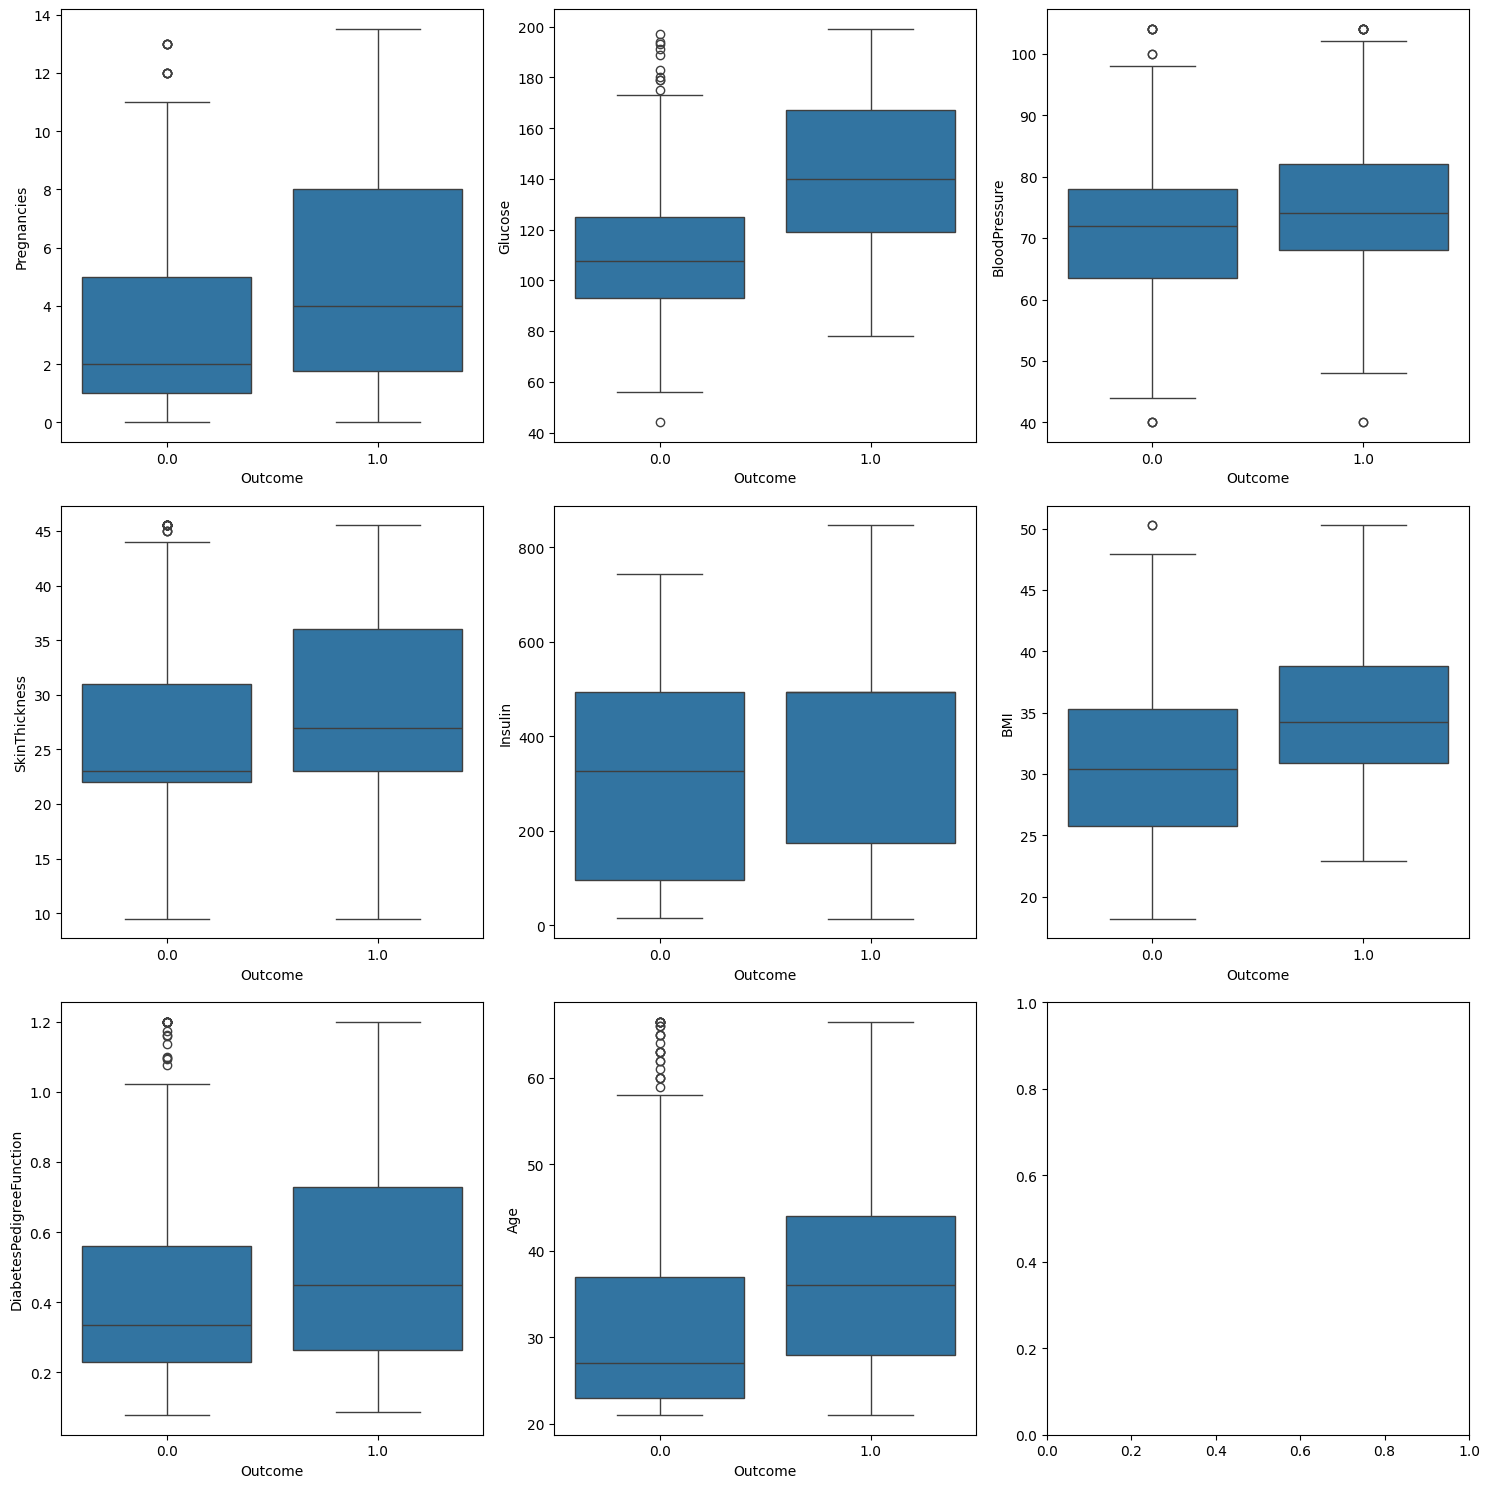

In [190]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

sns.boxplot(x= 'Outcome', y= 'Pregnancies', data=diabetes_df_copy , ax=axes[0,0])
sns.boxplot(x='Outcome', y='Glucose', data=diabetes_df_copy, ax=axes[0,1])
sns.boxplot(x='Outcome', y='BloodPressure', data=diabetes_df_copy, ax=axes[0,2])
sns.boxplot(x='Outcome', y='SkinThickness', data=diabetes_df_copy, ax=axes[1,0])
sns.boxplot(x='Outcome', y='Insulin', data=diabetes_df_copy, ax=axes[1,1])
sns.boxplot(x='Outcome', y='BMI', data=diabetes_df_copy, ax=axes[1,2])
sns.boxplot(x='Outcome', y='DiabetesPedigreeFunction', data=diabetes_df_copy, ax=axes[2,0])
sns.boxplot(x='Outcome', y='Age', data=diabetes_df_copy, ax=axes[2,1])

plt.tight_layout()
plt.show()

#Pandas Profiling (now known as Ydata Profiling)

In [191]:
!pip install ydata-profiling

In [192]:
from ydata_profiling import ProfileReport

In [193]:
profile_original = ProfileReport(diabetes_df)
profile_original.to_file(output_file='original_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 9/9 [00:00<00:00, 72.66it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [194]:
profile_copy = ProfileReport(diabetes_df_copy)
profile_copy.to_file(output_file='copy_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 9/9 [00:00<00:00, 72.41it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#Model Selection and Model Building

Since this is a Classification problem, models used will be
1. Logistic Regression
2. Decision Tree
3. Voting Ensemble
4. Random Forest (Bagging)
5. AdaBoost (Boosting)
6. XgBoost (Boosting)

In [195]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score

In [196]:
# Determine input and output columns
X = diabetes_df_copy.drop('Outcome', axis=1)
y = diabetes_df_copy['Outcome']

In [197]:
print (X.shape)
print (y.shape)

(768, 8)
(768,)


In [198]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [199]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [200]:
# Creating objects for all models
log_reg = LogisticRegression(max_iter=500)
dec_tree = DecisionTreeClassifier()
voting_clf = VotingClassifier(estimators=[('lr', log_reg), ('dt', dec_tree)])
random_forest = RandomForestClassifier()
adaboost = AdaBoostClassifier()
xgboost = XGBClassifier()

In [201]:
# Logistic Regression
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)
print("Logistic Regression Recall:", recall_lr)
print("Logistic Regression Precision:", precision_lr)
print("Logistic Regression F1 Score:", f1_lr)

Logistic Regression Accuracy: 0.7597402597402597
Logistic Regression Recall: 0.6545454545454545
Logistic Regression Precision: 0.6666666666666666
Logistic Regression F1 Score: 0.6605504587155964


In [202]:
# Decision Tree
dec_tree.fit(X_train, y_train)
y_pred_dt = dec_tree.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)
print("Decision Tree Recall:", recall_dt)
print("Decision Tree Precision:", precision_dt)
print("Decision Tree F1 Score:", f1_dt)

Decision Tree Accuracy: 0.7272727272727273
Decision Tree Recall: 0.6727272727272727
Decision Tree Precision: 0.6065573770491803
Decision Tree F1 Score: 0.6379310344827587


In [203]:
#Voting Ensemble
voting_clf.fit(X_train, y_train)
y_pred_vt = voting_clf.predict(X_test)
accuracy_vt = accuracy_score(y_test, y_pred_vt)
recall_vt = recall_score(y_test, y_pred_vt)
precision_vt = precision_score(y_test, y_pred_vt)
f1_vt = f1_score(y_test, y_pred_vt)
print("Voting Ensemble Accuracy:", accuracy_vt)
print("Voting Ensemble Recall:", recall_vt)
print("Voting Ensemble Precision:", precision_vt)
print("Voting Ensemble F1 Score:", f1_vt)

Voting Ensemble Accuracy: 0.7792207792207793
Voting Ensemble Recall: 0.5272727272727272
Voting Ensemble Precision: 0.7837837837837838
Voting Ensemble F1 Score: 0.6304347826086957


In [204]:
#Random Forest
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Recall:", recall_rf)
print("Random Forest Precision:", precision_rf)
print("Random Forest F1 Score:", f1_rf)

Random Forest Accuracy: 0.7662337662337663
Random Forest Recall: 0.6545454545454545
Random Forest Precision: 0.6792452830188679
Random Forest F1 Score: 0.6666666666666666


In [205]:
#AdaBoost
adaboost.fit(X_train, y_train)
y_pred_ab = adaboost.predict(X_test)
accuracy_ab = accuracy_score(y_test, y_pred_ab)
recall_ab = recall_score(y_test, y_pred_ab)
precision_ab = precision_score(y_test, y_pred_ab)
f1_ab = f1_score(y_test, y_pred_ab)
print("AdaBoost Accuracy:", accuracy_ab)
print("AdaBoost Recall:", recall_ab)
print("AdaBoost Precision:", precision_ab)
print("AdaBoost F1 Score:", f1_ab)

AdaBoost Accuracy: 0.7532467532467533
AdaBoost Recall: 0.7090909090909091
AdaBoost Precision: 0.639344262295082
AdaBoost F1 Score: 0.6724137931034483


In [206]:
#XgBoost
xgboost.fit(X_train, y_train)
y_pred_xg = xgboost.predict(X_test)
accuracy_xg = accuracy_score(y_test, y_pred_xg)
recall_xg = recall_score(y_test, y_pred_xg)
precision_xg = precision_score(y_test, y_pred_xg)
f1_xg = f1_score(y_test, y_pred_xg)
print("XgBoost Accuracy:", accuracy_xg)
print("XgBoost Recall:", recall_xg)
print("XgBoost Precision:", precision_xg)
print("XgBoost F1 Score:", f1_xg)

XgBoost Accuracy: 0.7272727272727273
XgBoost Recall: 0.6727272727272727
XgBoost Precision: 0.6065573770491803
XgBoost F1 Score: 0.6379310344827587


#Model Evaluation

In [207]:
# Accuracy score of all models
predictions = {
    "Model": ["Logistic Regression", "Decision Tree", "Voting Ensemble", "Random Forest", "AdaBoost", "XgBoost"],
    "Accuracy": [accuracy_lr, accuracy_dt, accuracy_vt, accuracy_rf, accuracy_ab, accuracy_xg],
    "Recall": [recall_lr, recall_dt, recall_vt, recall_rf, recall_ab, recall_xg],
    "Precision": [precision_lr, precision_dt, precision_vt, precision_rf, precision_ab, precision_xg],
    "F1-score": [f1_lr, f1_dt, f1_vt, f1_rf, f1_ab, f1_xg]
}

predictions_df = pd.DataFrame(predictions)
predictions_df


,Model,Accuracy,Recall,Precision,F1-score
0,Logistic Regression,0.759740,0.654545,0.666667,0.660550
1,Decision Tree,0.727273,0.672727,0.606557,0.637931
2,Voting Ensemble,0.779221,0.527273,0.783784,0.630435
3,Random Forest,0.766234,0.654545,0.679245,0.666667
4,AdaBoost,0.753247,0.709091,0.639344,0.672414
5,XgBoost,0.727273,0.672727,0.606557,0.637931


#Hyperparameter Tuning

In [208]:
# Importing GridSearch CV for Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [209]:
# Logistic Regression Hyperparater tuning
param_grid_lr = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300, 500, 1000]
}
grid_search_lr = GridSearchCV(estimator=log_reg, param_grid=param_grid_lr, cv=10, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)
best_params_lr = grid_search_lr.best_params_
best_score_lr = grid_search_lr.best_score_
print("Best Parameters for Logistic Regression:", best_params_lr)
print("Best Score for Logistic Regression:", best_score_lr)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best Parameters for Logistic Regression: {'C': 10, 'max_iter': 200, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Score for Logistic Regression: 0.7736382866208356


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
2400 fits failed out of a total of 4500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_s

In [210]:
# Decision Tree Hyperparameter Tuning
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10, 50, 100],
    'min_samples_leaf': [1, 2, 4, 10, 20, 50, 100]
}
grid_search_dt = GridSearchCV(estimator=dec_tree, param_grid=param_grid_dt, cv=10, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)
best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_
print("Best Parameters for Decision Tree:", best_params_dt)
print("Best Score for Decision Tree:", best_score_dt)

Best Parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 20, 'min_samples_split': 2}
Best Score for Decision Tree: 0.7849814912744579


In [211]:
#Voting Ensemble Hyperparameter tuning
param_grid_vt = {
    'voting': ['hard', 'soft'],
}
grid_search_vt = GridSearchCV(estimator=voting_clf, param_grid=param_grid_vt, cv=10, scoring='accuracy')
grid_search_vt.fit(X_train, y_train)
best_params_vt = grid_search_vt.best_params_
best_score_vt = grid_search_vt.best_score_
print("Best Parameters for Voting Ensemble:", best_params_vt)
print("Best Score for Voting Ensemble:", best_score_vt)

Best Parameters for Voting Ensemble: {'voting': 'hard'}
Best Score for Voting Ensemble: 0.7362242199894237


In [212]:
#Random Forest Hyperparameter tuning
param_grid_rf = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [5, 10, 50, 100],
    'min_samples_leaf': [5, 10, 15, 20, 50, 100],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}
grid_search_rf = GridSearchCV(estimator=random_forest, param_grid=param_grid_rf, cv=10, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_
print("Best Parameters for Random Forest:", best_params_rf)
print("Best Score for Random Forest:", best_score_rf)

Best Parameters for Random Forest: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 50}
Best Score for Random Forest: 0.7817028027498678


In [213]:
#AdaBoost Hyperparameter tuning
param_grid_ab = {
    'n_estimators': [50, 100, 200, 500],
    'learning_rate': [0.01, 0.1, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}
grid_search_ab = GridSearchCV(estimator=adaboost, param_grid=param_grid_ab, cv=10, scoring='accuracy')
grid_search_ab.fit(X_train, y_train)
best_params_ab = grid_search_ab.best_params_
best_score_ab = grid_search_ab.best_score_
print("Best Parameters for AdaBoost:", best_params_ab)
print("Best Score for AdaBoost:", best_score_ab)

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 

Best Parameters for AdaBoost: {'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 200}
Best Score for AdaBoost: 0.7735060814383924


In [214]:
#XgBoost Hyperparameter  tuning
param_grid_xg = {
    'n_estimators': [50, 100, 200, 500],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.5, 0.75, 1.0],
    'colsample_bytree': [0.5, 0.75, 1.0],
    'reg_alpha': [0, 0.5, 1.0],
    'reg_lambda': [0, 0.5, 1.0]
}
grid_search_xg = GridSearchCV(estimator=xgboost, param_grid=param_grid_xg, cv=10, scoring='accuracy')
grid_search_xg.fit(X_train, y_train)
best_params_xg = grid_search_xg.best_params_
best_score_xg = grid_search_xg.best_score_
print("Best Parameters for XgBoost:", best_params_xg)
print("Best Score for XgBoost:", best_score_xg)

Best Parameters for XgBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'reg_alpha': 0.5, 'reg_lambda': 0, 'subsample': 1.0}
Best Score for XgBoost: 0.7914066631411951


#Final Model Selection

In [215]:
predictions_df['Best score'] = [best_score_lr, best_score_dt, best_score_vt, best_score_rf, best_score_ab, best_score_xg]
predictions_df

,Model,Accuracy,Recall,Precision,F1-score,Best score
0,Logistic Regression,0.759740,0.654545,0.666667,0.660550,0.773638
1,Decision Tree,0.727273,0.672727,0.606557,0.637931,0.784981
2,Voting Ensemble,0.779221,0.527273,0.783784,0.630435,0.736224
3,Random Forest,0.766234,0.654545,0.679245,0.666667,0.781703
4,AdaBoost,0.753247,0.709091,0.639344,0.672414,0.773506
5,XgBoost,0.727273,0.672727,0.606557,0.637931,0.791407


In [216]:
predictions_df['Final-accuracy'] = np.where(predictions_df['Accuracy'] > predictions_df['Best score'], predictions_df['Accuracy'], predictions_df['Best score'])

predictions_df

,Model,Accuracy,Recall,Precision,F1-score,Best score,Final-accuracy
0,Logistic Regression,0.759740,0.654545,0.666667,0.660550,0.773638,0.773638
1,Decision Tree,0.727273,0.672727,0.606557,0.637931,0.784981,0.784981
2,Voting Ensemble,0.779221,0.527273,0.783784,0.630435,0.736224,0.779221
3,Random Forest,0.766234,0.654545,0.679245,0.666667,0.781703,0.781703
4,AdaBoost,0.753247,0.709091,0.639344,0.672414,0.773506,0.773506
5,XgBoost,0.727273,0.672727,0.606557,0.637931,0.791407,0.791407


Text(0, 0.5, 'Best Score')

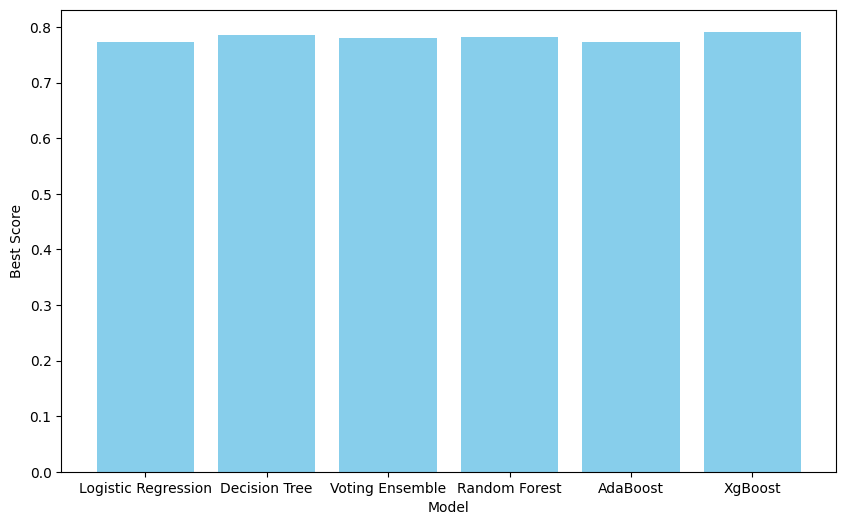

In [217]:
#Comparison graph of the best scores
plt.figure(figsize=(10, 6))
plt.bar(predictions_df['Model'], predictions_df['Final-accuracy'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Best Score')

In [218]:
#Best Model
print("Best Model is", predictions_df.loc[predictions_df['Final-accuracy'].idxmax(), 'Model'])

Best Model is XgBoost
